In [11]:
import numpy as np
import itertools
import pandas as pd
import json
FILE_PATH_NN_C = "Stats/NN_stats_10_epochs_8-64-512-2048--1_combined_old.json"
#FILE_PATH_TM = "Stats/TM_stats_10_epochs_8-64-512-2048.json"


In [12]:
loaded_stats_c = json.load(open("Stats/TM_stats_10_epochs_8-64-512-2048_combined_full.json", "r"))

arbitrary_value = next(iter(loaded_stats_c.values()))
epochs = len(arbitrary_value) - 1

INDEX_NAME = ["Output_size"]
MEMORY_TUPLE = lambda x : [f"{x}_{cat_name}" for cat_name in ["Reserved_Memory", "Allocated_Memory", "Free_Memory"]]
EPOCH_NAMES = ["Epoch", "Accuracy", "Average_loss", "APK", "Total_Time", "Epoch_training_time", "Epoch_test_time"]
RUN_TIME = ["End", "Run_time", "Dataset_size", "Y_items_count"]
#data_column_names =  INDEX_NAME + [column_name + f"_Epoch_{i}" for column_name in EPOCH_NAMES for i in range(epochs)] + RUN_TIME
data_column_names =  INDEX_NAME + MEMORY_TUPLE("Pre") + [column_name + f"_Epoch_{i}" for i in range(epochs) for column_name in EPOCH_NAMES] + RUN_TIME + MEMORY_TUPLE("Post")
#data_column_names += [f"tmp_{i}" for i in range(4)]
print(len(data_column_names))
#data_column_names

81


In [13]:
def flat_recursive(output_list, input):
    if type(input) != list:
        output_list.append(input)
        return
    for elem in input:
        flat_recursive(output_list, elem)

def flatten_list(list_elem):
    output_list = []
    flat_recursive(output_list, list_elem)
    return output_list

#flat_list_nn = [[key] + flatten_list(permuation) for key, permuation in loaded_stats_c.items()]

In [14]:

def create_relative_column(input_cat, out_cat_name, df):
    first_instance = df.iloc[0][input_cat]
    df[out_cat_name] = df[input_cat].apply(lambda x: x/first_instance)
    return df


In [15]:
def load_json_file(path):
    j_file = open(path, "r")
    json_stats = json.load(j_file)
    flattened_json = [[key] + flatten_list(permuation) for key, permuation in json_stats.items()]
    if len(flattened_json[0]) < len(data_column_names):
        print("Compensating for missing memory tuple...")
        for i in range(len(flattened_json)):
            flattened_json[i] = flattened_json[i][:1] + ([0]*(len(data_column_names) - len(flattened_json[i]))) + flattened_json[i][1:]
    stat_df = pd.DataFrame(flattened_json, columns=data_column_names)
    return stat_df

def create_relative_columns_set(df):
    #print(df.columns)
    df = create_relative_column("Run_time", "Relative_run_time", df)
    df = create_relative_column("Epoch_training_time_Epoch_9", "Relative_train_time_9", df)
    df = create_relative_column("Epoch_test_time_Epoch_9", "Relative_test_time_9", df)
    df = create_relative_column("Post_Allocated_Memory", "Relative_memory_allocated", df)
    return df

FILE_PATH_TM_FULL_1 = "Stats/TM_stats_10_epochs_8-64-512-2048_combined_full3.json"
#FILE_PATH_TM_FULL_2 = "Stats/TM_stats_10_epochs_8-64-512-2048_combined_full2.json"

tm_df_full1 = load_json_file(FILE_PATH_TM_FULL_1)
#tm_df_full2 = load_json_file(FILE_PATH_TM_FULL_2)

tm_df_full1 = create_relative_columns_set(tm_df_full1)
#tm_df_full2 = create_relative_columns_set(tm_df_full2)

tm_df_full1

Compensating for missing memory tuple...


,Output_size,Pre_Reserved_Memory,Pre_Allocated_Memory,Pre_Free_Memory,Epoch_Epoch_0,Accuracy_Epoch_0,Average_loss_Epoch_0,APK_Epoch_0,Total_Time_Epoch_0,Epoch_training_time_Epoch_0,...,Run_time,Dataset_size,Y_items_count,Post_Reserved_Memory,Post_Allocated_Memory,Post_Free_Memory,Relative_run_time,Relative_train_time_9,Relative_test_time_9,Relative_memory_allocated
0,8,0,0,0,0,0.306579,0.0,0.508592,9.076898,6.858009,...,43.787198,172896,8,0,0,0,1.000000,1.000000,1.000000,NaN
1,64,0,0,0,0,0.043585,0.0,0.103584,16.890766,12.236790,...,119.845940,684684,64,0,0,0,2.737009,3.003574,9.549061,NaN
2,512,0,0,0,0,0.009606,0.0,0.023262,54.153941,26.447805,...,458.801989,1623900,512,0,0,0,10.477994,7.665961,39.842438,NaN
3,2048,0,0,0,0,0.004081,0.0,0.010604,244.509196,85.694584,...,2350.624284,2249988,2048,0,0,0,53.682912,31.518872,167.326807,NaN


In [16]:
stats_df_nn = load_json_file(FILE_PATH_NN_C)
stats_df_nn = create_relative_columns_set(stats_df_nn)
stats_df_nn

,Output_size,Pre_Reserved_Memory,Pre_Allocated_Memory,Pre_Free_Memory,Epoch_Epoch_0,Accuracy_Epoch_0,Average_loss_Epoch_0,APK_Epoch_0,Total_Time_Epoch_0,Epoch_training_time_Epoch_0,...,Run_time,Dataset_size,Y_items_count,Post_Reserved_Memory,Post_Allocated_Memory,Post_Free_Memory,Relative_run_time,Relative_train_time_9,Relative_test_time_9,Relative_memory_allocated
0,8,8.388608,2.754048,5.634560,0,0.206150,0.523957,0.423156,4.338500,2.158886,...,52.368816,167288,8,8.388608,5.381632,3.006976,1.000000,1.000000,1.000000,1.000000
1,64,8.388608,5.381632,3.006976,0,0.024181,0.079791,0.075036,24.047729,10.698381,...,253.914883,831985,64,8.388608,5.412352,2.976256,4.848589,4.589522,5.955030,1.005708
2,512,8.388608,5.412352,2.976256,0,0.003446,0.023756,0.010869,107.425979,45.525178,...,1026.458082,3255384,512,8.388608,5.676544,2.712064,19.600559,20.425524,27.937994,1.054800
3,2048,8.388608,5.676544,2.712064,0,0.003181,0.073635,0.008149,188.447921,85.978132,...,1920.349130,6290273,2048,12.582912,6.585856,5.997056,36.669707,36.449370,46.628469,1.223766
4,-1,12.582912,6.585856,5.997056,0,0.000011,0.015985,0.000061,498.874373,202.423253,...,4729.240646,10348976,28729,98.566144,22.382592,76.183552,90.306427,84.792393,114.784842,4.159071


In [17]:
stats_df_nn["Epoch_test_time_Epoch_9"]

0      2.202017
1     13.113077
2     61.519939
3    102.676685
4    252.758182
Name: Epoch_test_time_Epoch_9, dtype: float64

Text(0.5, 1.0, 'Time Scaling by Class Count')

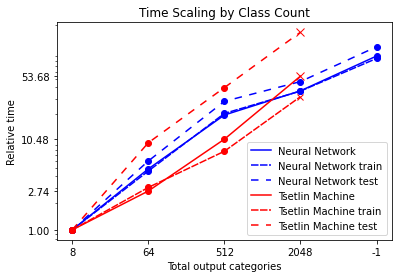

In [18]:
import matplotlib
import matplotlib.pyplot as plt
figure_time_scale = plt.figure()
ax_ts = figure_time_scale.add_subplot()
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_run_time"], "b", label="Neural Network")
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_run_time"], "bo")
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_train_time_9"], "b", label="Neural Network train", linestyle=(0, (5, 1)))
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_train_time_9"], "bo")
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_test_time_9"], "b", label="Neural Network test", linestyle=(0, (5, 5)))
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_test_time_9"], "bo")
plt.plot(tm_df_full1["Output_size"], tm_df_full1["Relative_run_time"], "r", label="Tsetlin Machine")
plt.plot(tm_df_full1["Output_size"][:-1], tm_df_full1["Relative_run_time"][:-1], "ro")
plt.plot(tm_df_full1["Output_size"].iloc[-1], tm_df_full1["Relative_run_time"].iloc[-1], "rx", markersize=8)
plt.plot(tm_df_full1["Output_size"], tm_df_full1["Relative_train_time_9"], "r", label="Tsetlin Machine train", linestyle=(0, (5, 1)))
plt.plot(tm_df_full1["Output_size"][:-1], tm_df_full1["Relative_train_time_9"][:-1], "ro")
plt.plot(tm_df_full1["Output_size"].iloc[-1], tm_df_full1["Relative_train_time_9"].iloc[-1], "rx")
plt.plot(tm_df_full1["Output_size"], tm_df_full1["Relative_test_time_9"], "r", label="Tsetlin Machine test", linestyle=(0, (5, 5)))
plt.plot(tm_df_full1["Output_size"][:-1], tm_df_full1["Relative_test_time_9"][:-1], "ro")
plt.plot(tm_df_full1["Output_size"].iloc[-1], tm_df_full1["Relative_test_time_9"].iloc[-1], "rx", markersize=8)
ax_ts.set_yscale("log")
ax_ts.set_yticks(tm_df_full1["Relative_run_time"])
ax_ts.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax_ts.legend()

plt.xlabel("Total output categories")
plt.ylabel("Relative time")
plt.title("Time Scaling by Class Count")

# figure_time_scale = plt.figure()
# ax_ts = figure_time_scale.add_subplot()
# ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_run_time"], "b", label="Neural Network")
# ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_run_time"], "bv")
# plt.plot(tm_df_full2["Output_size"], tm_df_full2["Relative_run_time"], "r", label="Tsetlin Machine")
# plt.plot(tm_df_full2["Output_size"][:-1], tm_df_full2["Relative_run_time"][:-1], "rv")
# plt.plot(tm_df_full2["Output_size"].iloc[-1], tm_df_full2["Relative_run_time"].iloc[-1], "rx", markersize=8)
# ax_ts.set_yscale("log")
# ax_ts.set_yticks(tm_df_full2["Relative_run_time"])
# ax_ts.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax_ts.legend()
#
# plt.xlabel("Total output categories")
# plt.ylabel("Relative time")
# plt.title("Time Scaling by Class Count")

Text(0.5, 1.0, 'Training Time Scaling by Class Count')

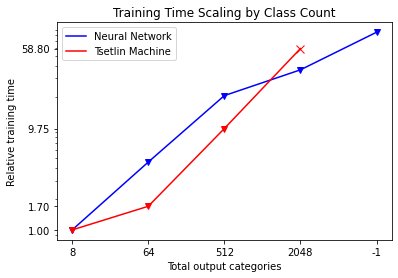

In [67]:
figure_time_scale = plt.figure()
ax_ts = figure_time_scale.add_subplot()
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_train_time_9"], "b", label="Neural Network")
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_train_time_9"], "bv")
plt.plot(tm_df_full2["Output_size"], tm_df_full2["Relative_train_time_9"], "r", label="Tsetlin Machine")
plt.plot(tm_df_full2["Output_size"][:-1], tm_df_full2["Relative_train_time_9"][:-1], "rv")
plt.plot(tm_df_full2["Output_size"].iloc[-1], tm_df_full2["Relative_train_time_9"].iloc[-1], "rx", markersize=8)
ax_ts.set_yscale("log")
ax_ts.set_yticks(tm_df_full2["Relative_train_time_9"])
ax_ts.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax_ts.legend()

plt.xlabel("Total output categories")
plt.ylabel("Relative training time")
plt.title("Training Time Scaling by Class Count")

Text(0.5, 1.0, 'Test Time Scaling by Class Count')

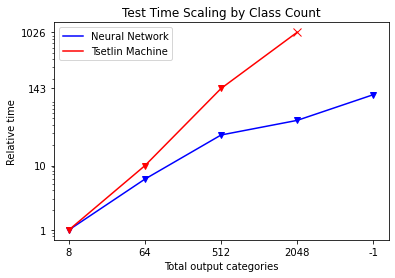

In [68]:
figure_time_scale = plt.figure()
ax_ts = figure_time_scale.add_subplot()
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_test_time_9"], "b", label="Neural Network")
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["Relative_test_time_9"], "bv")
plt.plot(tm_df_full2["Output_size"], tm_df_full2["Relative_test_time_9"], "r", label="Tsetlin Machine")
plt.plot(tm_df_full2["Output_size"][:-1], tm_df_full2["Relative_test_time_9"][:-1], "rv")
plt.plot(tm_df_full2["Output_size"].iloc[-1], tm_df_full2["Relative_test_time_9"].iloc[-1], "rx", markersize=8)
ax_ts.set_yscale("log")
ax_ts.set_yticks(tm_df_full2["Relative_test_time_9"])
ax_ts.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax_ts.legend()

plt.xlabel("Total output categories")
plt.ylabel("Relative time")
plt.title("Test Time Scaling by Class Count")

In [ ]:
figure_mem_scale = plt.figure()
ax_ts = figure_time_scale.add_subplot()
ax_ts.plot(stats_df_nn["Output_size"], stats_df_nn["relative_time_epoch_9"])
#plt.plot(stats_df_tm["Output_size"], stats_df_tm["relative_time_epoch_9"])
#plt.plot(stats_df_tm["Output_size"].iloc[-1], stats_df_tm["relative_time_epoch_9"].iloc[-1], "rx", markersize=8)
ax_ts.set_yscale("log")
ax_ts.set_yticks(stats_df_nn["relative_time_epoch_9"])
ax_ts.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("Total output categories")
plt.ylabel("Relative time")
plt.title("Time scaling by class count")

In [13]:
stats_df = pd.DataFrame(flat_list, columns=data_column_names)
stats_df = stats_df.astype({"Output_size":"category"})
stats_df.dtypes

ValueError: 81 columns passed, passed data had 43 columns

In [6]:
data_column_names_tm = data_column_names
data_column_names_tm.append("Unique_y_values")

stats_df_tm = pd.DataFrame(flat_list_tm, columns=data_column_names)
stats_df_tm = stats_df_tm.astype({"Output_size":"category"})
stats_df_tm.dtypes

Output_size             category
Accuracy_Epoch_0         float64
Average_loss_Epoch_0     float64
APK_Epoch_0              float64
Time_Epoch_0             float64
Accuracy_Epoch_1         float64
Average_loss_Epoch_1     float64
APK_Epoch_1              float64
Time_Epoch_1             float64
Accuracy_Epoch_2         float64
Average_loss_Epoch_2     float64
APK_Epoch_2              float64
Time_Epoch_2             float64
Accuracy_Epoch_3         float64
Average_loss_Epoch_3     float64
APK_Epoch_3              float64
Time_Epoch_3             float64
Accuracy_Epoch_4         float64
Average_loss_Epoch_4     float64
APK_Epoch_4              float64
Time_Epoch_4             float64
Accuracy_Epoch_5         float64
Average_loss_Epoch_5     float64
APK_Epoch_5              float64
Time_Epoch_5             float64
Accuracy_Epoch_6         float64
Average_loss_Epoch_6     float64
APK_Epoch_6              float64
Time_Epoch_6             float64
Accuracy_Epoch_7         float64
Average_lo

In [7]:
stats_df_tm

,Output_size,Accuracy_Epoch_0,Average_loss_Epoch_0,APK_Epoch_0,Time_Epoch_0,Accuracy_Epoch_1,Average_loss_Epoch_1,APK_Epoch_1,Time_Epoch_1,Accuracy_Epoch_2,...,Average_loss_Epoch_8,APK_Epoch_8,Time_Epoch_8,Accuracy_Epoch_9,Average_loss_Epoch_9,APK_Epoch_9,Time_Epoch_9,Run_time,Y_items_count,Unique_y_values
0,8,0.161078,0.0,0.380483,5.126617,0.170283,0.0,0.388142,9.142627,0.163051,...,0.0,0.392729,39.017431,0.176529,0.0,0.390702,43.302280,52.623391,182496,8
1,64,0.024724,0.0,0.069269,9.999676,0.026707,0.0,0.071239,18.093479,0.025583,...,0.0,0.070724,75.745354,0.025187,0.0,0.071281,83.998022,100.120673,907620,64
2,512,0.004849,0.0,0.013106,49.837901,0.004511,0.0,0.012611,95.504247,0.004748,...,0.0,0.012279,428.602679,0.004241,0.0,0.012762,476.588152,500.959170,3551328,512
3,2048,0.001722,0.0,0.005142,240.565276,0.001784,0.0,0.005044,476.504824,0.001810,...,0.0,0.005189,2129.849571,0.001722,0.0,0.004948,2365.658746,2398.343765,6862116,2048


In [8]:
import matplotlib.pyplot as plt
import numpy as np

first_time = stats_df.iloc[0]["Time_Epoch_9"]
stats_df["relative_time_epoch_9"] = stats_df["Time_Epoch_9"].apply(lambda x: x/first_time)
stats_df

,Output_size,Accuracy_Epoch_0,Average_loss_Epoch_0,APK_Epoch_0,Time_Epoch_0,Accuracy_Epoch_1,Average_loss_Epoch_1,APK_Epoch_1,Time_Epoch_1,Accuracy_Epoch_2,...,Average_loss_Epoch_8,APK_Epoch_8,Time_Epoch_8,Accuracy_Epoch_9,Average_loss_Epoch_9,APK_Epoch_9,Time_Epoch_9,Run_time,Y_items_count,relative_time_epoch_9
0,8,0.150161,0.529169,0.373863,3.257740,0.156882,0.528794,0.382424,6.497913,0.167911,...,0.527946,0.389212,36.548022,0.174786,0.528128,0.390523,40.952191,167288,167288,1.000000
1,64,0.017801,0.080457,0.056421,19.913076,0.017589,0.080187,0.061647,42.484742,0.020570,...,0.079955,0.067784,201.327483,0.022072,0.080031,0.067127,223.849822,831985,831985,5.466126
2,512,0.003226,0.023803,0.009366,86.913414,0.002703,0.023793,0.009085,175.555610,0.003378,...,0.023751,0.010550,819.231249,0.003331,0.023751,0.010220,904.061037,3255384,3255384,22.076012
3,2048,0.002019,0.073658,0.004416,182.612050,0.001285,0.073654,0.004035,369.249682,0.001512,...,0.073649,0.004139,1862.515646,0.001477,0.073648,0.004072,2079.105025,6290273,6290273,50.769080
4,-1,0.000037,0.015985,0.000114,1069.531084,0.000016,0.015985,0.000100,2221.905831,0.001020,...,0.015984,0.003708,10757.576585,0.001158,0.015984,0.003667,12013.171201,10348976,10348976,293.346241


In [9]:
first_time_tm = stats_df_tm.iloc[0]["Time_Epoch_9"]
stats_df_tm["relative_time_epoch_9"] = stats_df_tm["Time_Epoch_9"].apply(lambda x: x/first_time)
stats_df_tm

,Output_size,Accuracy_Epoch_0,Average_loss_Epoch_0,APK_Epoch_0,Time_Epoch_0,Accuracy_Epoch_1,Average_loss_Epoch_1,APK_Epoch_1,Time_Epoch_1,Accuracy_Epoch_2,...,APK_Epoch_8,Time_Epoch_8,Accuracy_Epoch_9,Average_loss_Epoch_9,APK_Epoch_9,Time_Epoch_9,Run_time,Y_items_count,Unique_y_values,relative_time_epoch_9
0,8,0.161078,0.0,0.380483,5.126617,0.170283,0.0,0.388142,9.142627,0.163051,...,0.392729,39.017431,0.176529,0.0,0.390702,43.302280,52.623391,182496,8,1.057386
1,64,0.024724,0.0,0.069269,9.999676,0.026707,0.0,0.071239,18.093479,0.025583,...,0.070724,75.745354,0.025187,0.0,0.071281,83.998022,100.120673,907620,64,2.051124
2,512,0.004849,0.0,0.013106,49.837901,0.004511,0.0,0.012611,95.504247,0.004748,...,0.012279,428.602679,0.004241,0.0,0.012762,476.588152,500.959170,3551328,512,11.637672
3,2048,0.001722,0.0,0.005142,240.565276,0.001784,0.0,0.005044,476.504824,0.001810,...,0.005189,2129.849571,0.001722,0.0,0.004948,2365.658746,2398.343765,6862116,2048,57.766354


Text(0.5, 1.0, 'Time scaling by class count')

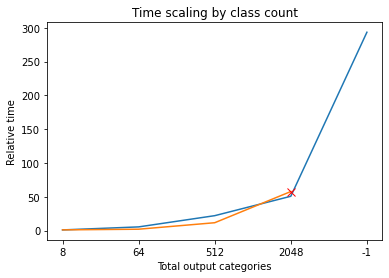

In [18]:
plt.plot(stats_df["Output_size"], stats_df["relative_time_epoch_9"])
plt.plot(stats_df_tm["Output_size"], stats_df_tm["relative_time_epoch_9"])
plt.plot(stats_df_tm["Output_size"].iloc[-1], stats_df_tm["relative_time_epoch_9"].iloc[-1], "rx", markersize=8)
plt.xlabel("Total output categories")
plt.ylabel("Relative time")
plt.title("Time scaling by class count")